**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5035 - Proyecto Integrador**

Tecnológico de Monterrey

Prof Horacio Martínez Alfaro

**Módulo 2**
Preparación de los datos

**Equipo 18**

Joaquín Díaz Hernández - A01281536

Divad Alejandro Shriqui Garrón - A01366907

Manuel Romero Alvarez - A00567983


---

# **Análisis Exploratorio de Datos (EDA)**

## **Introducción**

El presente análisis exploratorio de datos (EDA) tiene como objetivo examinar y describir la información contenida en el dataset de **gastos de viaje de la empresa**, que comprende el periodo de **enero 2024 a septiembre 2025**.  

A pesar de que existen alrededor de 8 clasificaciones de tipos de gastos de viaje en el conjunto completo, nosotros nos enfocaremos en las tres categorías principales:
- **Alimentación**
- **Hospedaje**
- **Transportación**

El propósito de este EDA es identificar patrones, inconsistencias y características relevantes de los datos que permitan:
- Comprender mejor la estructura y calidad de la información.
- Detectar valores faltantes, atípicos o distribuciones sesgadas.
- Analizar la distribución de gastos según categorías, empleados y periodos de tiempo.
- Evaluar la posible presencia de desequilibrio entre clases.
- Proponer estrategias de preprocesamiento para preparar los datos hacia etapas posteriores del proyecto.

El análisis se apoyará en técnicas estadísticas y de visualización (análisis univariante, bivariado y multivariante), con un enfoque en **la variable de clasificación** que es la columna llamada `Desc.1` en el dataset, que será clave para futuros modelos de automatización y clasificación de gastos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = '/content/drive/MyDrive/MNA - Proyecto Integrador/Semana 3'
os.chdir(DIR)

## **Librerias**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pdf2image import convert_from_path
from scipy.stats import skew

## **Carga y exploración inicial de los datos**

El dataset original proporcionado por la empresa es un excel. Este excel lo convertimos a csv para exportarlo y generar el dataframe **df**.

In [4]:
df = pd.read_csv("gv_datos.csv", encoding="latin-1")
df

,CpnyID,Post,Company,Cuenta,Nombre cuenta,Entidad,Empleado,Desc,Proyecto,ID,...,Periodo,Referencia,Fecha,Fecha,User,Desc.1,Cargo,Credito,Total,Moneda
0,01-24,AP,INTER,602301001.0,Alimentación (GVV),102-OPT,E01013,BILLA,X0159R,AC,...,01-24,814603.0,11/01/2024 00:00:00 a.1./p.1.,11/01/2024 10:36:00 a.1./p.1.,ADRARIZM,Alimentacion,296.70,0.00,296.70,MXP
1,01-24,AP,INTER,602301001.0,Alimentación (GVV),102-OPT,E01013,HUDSON,X0159R,AC,...,01-24,814604.0,11/01/2024 00:00:00 a.1./p.1.,11/01/2024 10:36:00 a.1./p.1.,ADRARIZM,Alimentacion,250.91,0.00,250.91,MXP
2,01-24,AP,INTER,602301001.0,Alimentación (GVV),102-OPT,E01013,MCDONALDS,X0159R,AC,...,01-24,814605.0,11/01/2024 00:00:00 a.1./p.1.,11/01/2024 10:36:00 a.1./p.1.,ADRARIZM,Alimentacion,281.15,0.00,281.15,MXP
3,01-24,AP,INTER,602301001.0,Alimentación (GVV),102-OPT,E01013,A817,X0159R,AC,...,01-24,814606.0,11/01/2024 00:00:00 a.1./p.1.,11/01/2024 10:36:00 a.1./p.1.,ADRARIZM,Alimentacion,266.14,0.00,266.14,MXP
4,01-24,AP,INTER,602301001.0,Alimentación (GVV),102-OPT,E01013,ABLA1031,X0159R,AC,...,01-24,814608.0,11/01/2024 00:00:00 a.1./p.1.,11/01/2024 10:36:00 a.1./p.1.,ADRARIZM,Alimentacion,28.22,0.00,28.22,MXP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,05-24,AP,INTER,602301007.0,Hospedaje (GVV),910-MTY,E00598,COURTYARD BY MA,X0937S,AC,...,05-24,829918.0,20/05/2024 00:00:00 a.5./p.5.,21/05/2024 11:42:00 a.5./p.5.,LUCALVAR,Hotel,11224.12,0.00,11224.12,MXP
16422,12-24,AP,INTER,602301007.0,Hospedaje (GVV),920-MTY,E01451,THE WESTIN,X7769P,AC,...,12-24,860594.0,11/12/2024 00:00:00 a.12./p.12.,11/12/2024 15:16:00 a.12./p.12.,LUCALVAR,Hotel,2742.51,0.00,2742.51,MXP
16423,12-24,AP,INTER,602301007.0,Hospedaje (GVV),920-MTY,E01451,THE WESTIN,X7769P,AC,...,12-24,860594.0,11/12/2024 00:00:00 a.12./p.12.,11/12/2024 15:16:00 a.12./p.12.,LUCALVAR,Hotel,1386.97,0.00,1386.97,MXP
16424,12-24,AP,INTER,602301007.0,Hospedaje (GVV),920-MTY,E01487,WESTIN,X7769P,AC,...,12-24,860628.0,11/12/2024 00:00:00 a.12./p.12.,11/12/2024 15:16:00 a.12./p.12.,LUCALVAR,Hotel,2705.22,0.00,2705.22,MXP


In [5]:
df.shape

(16426, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CpnyID         16425 non-null  object 
 1   Post           16425 non-null  object 
 2   Company        16425 non-null  object 
 3   Cuenta         16425 non-null  float64
 4   Nombre cuenta  16425 non-null  object 
 5   Entidad        16425 non-null  object 
 6   Empleado       16418 non-null  object 
 7   Desc           16351 non-null  object 
 8   Proyecto       16425 non-null  object 
 9   ID             16425 non-null  object 
 10  Batch          16425 non-null  float64
 11  Periodo        16425 non-null  object 
 12  Referencia     16405 non-null  float64
 13  Fecha          16425 non-null  object 
 14  Fecha          16425 non-null  object 
 15  User           16425 non-null  object 
 16  Desc.1         16382 non-null  object 
 17  Cargo          16426 non-null  float64
 18  Credit

Utilizando info() podemos observar que tenemos un total de 21 columnas con 16426 registros. De acuerdo al tipo de dato obtenido del dataframe, tenemos 6 columnas numericas y 15 cualitativas.

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CpnyID,16425,21,12-24,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Post,16425,4,AP,16352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company,16425,1,INTER,16425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cuenta,16425.0,NaN,NaN,NaN,602301002.927062,2.601292,602301001.0,602301001.0,602301001.0,602301006.0,602301007.0
Nombre cuenta,16425,3,Alimentación (GVV),10557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Entidad,16425,13,102-OPT,8231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Empleado,16418,142,E01013,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Desc,16351,6905,HOLIDAY INN,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Proyecto,16425,394,A3835R,938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID,16425,5,AC,16305,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analizando las columnas, podemos comentar que las columnas clave serian:
* Fecha
* Total
* Referencia
* Desc.1 -> Variable de Clasificación



## **Valores faltantes y calidad de datos**

In [8]:
length = len(df)
(df.isnull().sum().sort_values(ascending=False)/length)*100

,0
Desc,0.456593
Desc.1,0.267868
Referencia,0.127846
Empleado,0.048703
CpnyID,0.006088
Nombre cuenta,0.006088
Cuenta,0.006088
Company,0.006088
Post,0.006088
Proyecto,0.006088


Podemos observar que casi todas las columnas (excepto Cargo, Credito y Total) contienen valores faltantes. Varios de ellos tienen el mismo porcentaje, por lo que talvez son los mismos registros que estan vacíos.

In [9]:
len(df[df.isnull().any(axis=1)])

116

Tenemos 116 columnas con valores faltantes

In [10]:
df[df.isnull().any(axis=1)]

,CpnyID,Post,Company,Cuenta,Nombre cuenta,Entidad,Empleado,Desc,Proyecto,ID,...,Periodo,Referencia,Fecha,Fecha,User,Desc.1,Cargo,Credito,Total,Moneda
182,02-24,GJ,INTER,602301001.0,Alimentación (GVV),102-OPT,NaN,NaN,X0152R,GL,...,02-24,NaN,27/02/2024 00:00:00 a.2./p.2.,27/02/2024 18:07:00 a.2./p.2.,OSCVAZQU,Gastos GV Tania Feb 2024,0.00,4928.71,-4928.71,MXP
397,03-24,GL,INTER,602301001.0,Alimentación (GVV),102-OPT,E01088,NaN,X0152R,GL,...,03-24,NaN,27/03/2024 00:00:00 a.3./p.3.,27/03/2024 15:31:00 a.3./p.3.,ADRARIZM,NaN,0.00,448.39,-448.39,MXP
1276,05-24,AP,INTER,602301001.0,Alimentación (GVV),102-OPT,E01445,039967,X0160R,AD,...,05-24,831767.0,29/05/2024 00:00:00 a.5./p.5.,29/05/2024 12:58:00 a.5./p.5.,ADRARIZM,NaN,0.00,0.01,-0.01,MXP
3786,12-24,AP,INTER,602301001.0,Alimentación (GVV),102-OPT,E01152,041087,A3835R,AD,...,12-24,860583.0,11/12/2024 00:00:00 a.12./p.12.,11/12/2024 13:01:00 a.12./p.12.,ADRARIZM,NaN,0.00,1.00,-1.00,MXP
4457,02-25,AP,INTER,602301001.0,Alimentación (GVV),102-OPT,E01013,NaN,X0227R,AC,...,02-25,868610.0,18/02/2025 00:00:00 a.2./p.2.,19/02/2025 12:07:00 a.2./p.2.,ADRARIZM,Alimentacion,19.45,0.00,19.45,MXP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16417,03-25,PO,INTER,602301007.0,Hospedaje (GVV),906-MTY,P002392,NaN,X0906,R,...,03-25,105835.0,17/02/2025 00:00:00 a.2./p.2.,18/03/2025 15:53:00 a.3./p.3.,OSCMARTI,HOSPEDAJE COURTYARD SAN JERONI,3108.00,0.00,3108.00,MXP
16418,05-25,PO,INTER,602301007.0,Hospedaje (GVV),906-MTY,P002392,NaN,X0906,R,...,05-25,106365.0,21/03/2025 00:00:00 a.3./p.3.,08/05/2025 17:00:00 a.5./p.5.,OSCMARTI,FACT IMON 182100 | HOSPEDAJE C,3200.00,0.00,3200.00,MXP
16419,05-25,PO,INTER,602301007.0,Hospedaje (GVV),906-MTY,P002392,NaN,X0906,R,...,05-25,106382.0,06/05/2025 00:00:00 a.5./p.5.,09/05/2025 15:25:00 a.5./p.5.,OSCMARTI,imon 192528 HOSPEDAJE DE EMPLE,3200.00,0.00,3200.00,MXP
16420,06-25,PO,INTER,602301007.0,Hospedaje (GVV),906-MTY,P002392,NaN,X0906,R,...,06-25,106883.0,03/06/2025 00:00:00 a.6./p.6.,25/06/2025 08:25:00 a.6./p.6.,OSCMARTI,IMON 200434 HOSPEDAJE DE EMPLE,1600.00,0.00,1600.00,MXP


El ultimo registro tiene puros valores NaN, este parece incluir la sumatoria de todos los registros, por lo que podemos proceder a borrarlo.

In [11]:
df = df.drop(index=16425)

In [12]:
length = len(df)
(df.isnull().sum().sort_values(ascending=False)/length)*100

,0
Desc,0.450533
Desc.1,0.261796
Referencia,0.121766
Empleado,0.042618
CpnyID,0.000000
Nombre cuenta,0.000000
Cuenta,0.000000
Company,0.000000
Post,0.000000
Proyecto,0.000000


De esta manera nos quedan menos columnas con valores faltantes.

Analizando estas columnas, lo mejor sera borrar estos registros, para no causar ruido en el analisis.

In [13]:
df.dropna(inplace=True)

In [14]:
length = len(df)
(df.isnull().sum().sort_values(ascending=False)/length)*100

,0
CpnyID,0.0
Post,0.0
Company,0.0
Cuenta,0.0
Nombre cuenta,0.0
Entidad,0.0
Empleado,0.0
Desc,0.0
Proyecto,0.0
ID,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16310 entries, 0 to 16424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CpnyID         16310 non-null  object 
 1   Post           16310 non-null  object 
 2   Company        16310 non-null  object 
 3   Cuenta         16310 non-null  float64
 4   Nombre cuenta  16310 non-null  object 
 5   Entidad        16310 non-null  object 
 6   Empleado       16310 non-null  object 
 7   Desc           16310 non-null  object 
 8   Proyecto       16310 non-null  object 
 9   ID             16310 non-null  object 
 10  Batch          16310 non-null  float64
 11  Periodo        16310 non-null  object 
 12  Referencia     16310 non-null  float64
 13  Fecha          16310 non-null  object 
 14  Fecha          16310 non-null  object 
 15  User           16310 non-null  object 
 16  Desc.1         16310 non-null  object 
 17  Cargo          16310 non-null  float64
 18  Credito    

De esta manera ya no tenemos ningun registro con valores faltantes y terminamos obteniendo un total de **16310** registros.

## **Variables Numéricas y valores atípicos**

Eliminar registros que tengan credito, porque analizaremos solo los gastos (Cargos).

La variable `Cuenta` es la referencia numerica de `Nombre cuenta`, por lo que procederemos a borrarla por ser información redundante e innecesaria. También eliminaremos la varaible Total, ya que termina siendo el mismo valor que Cargo o Credito.

In [16]:
df = df.drop(["Cuenta", "Total"], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16310 entries, 0 to 16424
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CpnyID         16310 non-null  object 
 1   Post           16310 non-null  object 
 2   Company        16310 non-null  object 
 3   Nombre cuenta  16310 non-null  object 
 4   Entidad        16310 non-null  object 
 5   Empleado       16310 non-null  object 
 6   Desc           16310 non-null  object 
 7   Proyecto       16310 non-null  object 
 8   ID             16310 non-null  object 
 9   Batch          16310 non-null  float64
 10  Periodo        16310 non-null  object 
 11  Referencia     16310 non-null  float64
 12  Fecha          16310 non-null  object 
 13  Fecha          16310 non-null  object 
 14  User           16310 non-null  object 
 15  Desc.1         16310 non-null  object 
 16  Cargo          16310 non-null  float64
 17  Credito        16310 non-null  float64
 18  Moneda     

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Batch,16310.0,501044.139853,9484.670907,483120.0,493584.00,501056.00,508772.00,517964.00
Referencia,16310.0,854850.208338,21419.079743,814603.0,837210.25,856330.00,871724.00,892558.00
Cargo,16310.0,3576.929072,8985.447746,0.0,247.41,583.13,2272.59,190380.00
Credito,16310.0,4.868986,233.911361,0.0,0.00,0.00,0.00,16481.65


Batch y referencia seran utilizados mas adelante para hacer un cruce entre el ticket y el registro en este dataset, es por eso que mantendremos estos campos.

Procederemos a eliminar todos los registros que tengan un valor en `Credito`. Ya que estos son registros de devoluciones y para este proyecto consideraremos solo los gastos (los registros con valores en `Cargo`)

In [19]:
df = df[df["Credito"] == 0]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16290 entries, 0 to 16424
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CpnyID         16290 non-null  object 
 1   Post           16290 non-null  object 
 2   Company        16290 non-null  object 
 3   Nombre cuenta  16290 non-null  object 
 4   Entidad        16290 non-null  object 
 5   Empleado       16290 non-null  object 
 6   Desc           16290 non-null  object 
 7   Proyecto       16290 non-null  object 
 8   ID             16290 non-null  object 
 9   Batch          16290 non-null  float64
 10  Periodo        16290 non-null  object 
 11  Referencia     16290 non-null  float64
 12  Fecha          16290 non-null  object 
 13  Fecha          16290 non-null  object 
 14  User           16290 non-null  object 
 15  Desc.1         16290 non-null  object 
 16  Cargo          16290 non-null  float64
 17  Credito        16290 non-null  float64
 18  Moneda     

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Batch,16290.0,501043.386188,9490.467461,483120.0,493582.0000,501049.0,508772.0000,517964.0
Referencia,16290.0,854847.430203,21432.078276,814603.0,837187.2500,856319.0,871725.0000,892558.0
Cargo,16290.0,3581.320636,8990.087591,0.0,248.3825,584.1,2285.8675,190380.0
Credito,16290.0,0.000000,0.000000,0.0,0.0000,0.0,0.0000,0.0


De esta manera ya no tenemos registros con Creditos, procederemos a eliminar esta columna.

In [22]:
df = df.drop(["Credito"], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16290 entries, 0 to 16424
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CpnyID         16290 non-null  object 
 1   Post           16290 non-null  object 
 2   Company        16290 non-null  object 
 3   Nombre cuenta  16290 non-null  object 
 4   Entidad        16290 non-null  object 
 5   Empleado       16290 non-null  object 
 6   Desc           16290 non-null  object 
 7   Proyecto       16290 non-null  object 
 8   ID             16290 non-null  object 
 9   Batch          16290 non-null  float64
 10  Periodo        16290 non-null  object 
 11  Referencia     16290 non-null  float64
 12  Fecha          16290 non-null  object 
 13  Fecha          16290 non-null  object 
 14  User           16290 non-null  object 
 15  Desc.1         16290 non-null  object 
 16  Cargo          16290 non-null  float64
 17  Moneda         16290 non-null  object 
dtypes: float64(

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Batch,16290.0,501043.386188,9490.467461,483120.0,493582.0000,501049.0,508772.0000,517964.0
Referencia,16290.0,854847.430203,21432.078276,814603.0,837187.2500,856319.0,871725.0000,892558.0
Cargo,16290.0,3581.320636,8990.087591,0.0,248.3825,584.1,2285.8675,190380.0


In [25]:
df[df["Cargo"] == 0]

,CpnyID,Post,Company,Nombre cuenta,Entidad,Empleado,Desc,Proyecto,ID,Batch,Periodo,Referencia,Fecha,Fecha,User,Desc.1,Cargo,Moneda
4442,02-25,AP,INTER,Alimentación (GVV),102-OPT,E01013,0023,X0227R,AC,507166.0,02-25,868583.0,18/02/2025 00:00:00 a.2./p.2.,19/02/2025 12:07:00 a.2./p.2.,ADRARIZM,Alimentacion,0.0,MXP
8972,01-25,AP,INTER,Alimentación (GVV),201-MTY,E00618,BUFFALO WILD WN,M7453P,AC,506053.0,01-25,866263.0,29/01/2025 00:00:00 a.1./p.1.,29/01/2025 15:05:00 a.1./p.1.,LUCALVAR,Alimentacion,0.0,MXP
10100,08-25,AP,INTER,Alimentación (GVV),201-MTY,E00735,163091325072414,M7832P,AC,516956.0,08-25,889477.0,28/08/2025 00:00:00 a.8./p.8.,28/08/2025 16:41:00 a.8./p.8.,ANDGODIN,Alimentacion,0.0,MXP
11757,08-25,AP,INTER,Transportación (GVV),102-OPT,E00700,ALASKA AIRLINES,A3545RS,AC,516765.0,08-25,889323.0,26/08/2025 00:00:00 a.8./p.8.,01/09/2025 15:36:00 a.9./p.9.,ADRARIZM,Vuelo,0.0,MXP
13285,02-25,AP,INTER,Transportación (GVV),201-MTY,E00735,UNITED,M7575P,AC,506725.0,02-25,867926.0,11/02/2025 00:00:00 a.2./p.2.,11/02/2025 10:54:00 a.2./p.2.,LUCALVAR,Transportacion,0.0,MXP
13639,06-25,AP,INTER,Transportación (GVV),201-MTY,E00977,UBER TRIP,X0931,AC,512495.0,06-25,880041.0,05/06/2025 00:00:00 a.6./p.6.,05/06/2025 11:01:00 a.6./p.6.,LUCALVAR,UBER\DIDI,0.0,MXP
13797,07-25,AP,INTER,Transportación (GVV),201-MTY,E00618,AEROMEXICO 8697,M8039P,AC,514878.0,07-25,885236.0,24/07/2025 00:00:00 a.7./p.7.,24/07/2025 16:09:00 a.7./p.7.,LUCALVAR,Vuelo,0.0,MXP


Tenemos algunos registros que el Cargo es de $0, por lo que procederemos a eliminar estos registros tambien, ya que no deberían existir y pueden ser errores en el dataset.

In [26]:
df = df[df["Cargo"] != 0]

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Batch,16283.0,501038.857889,9489.536714,483120.00,493582.00,501042.00,508772.00,517964.0
Referencia,16283.0,854837.424860,21430.326879,814603.00,837185.50,856313.00,871724.00,892558.0
Cargo,16283.0,3582.860232,8991.713155,0.01,248.84,584.83,2287.43,190380.0


Entonces nos quedan 3 columnas numéricas. Pero Batch y Referencia se usaran solamente para hacer la referencia cruzada con el ticket.

In [28]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['Batch', 'Referencia', 'Cargo']

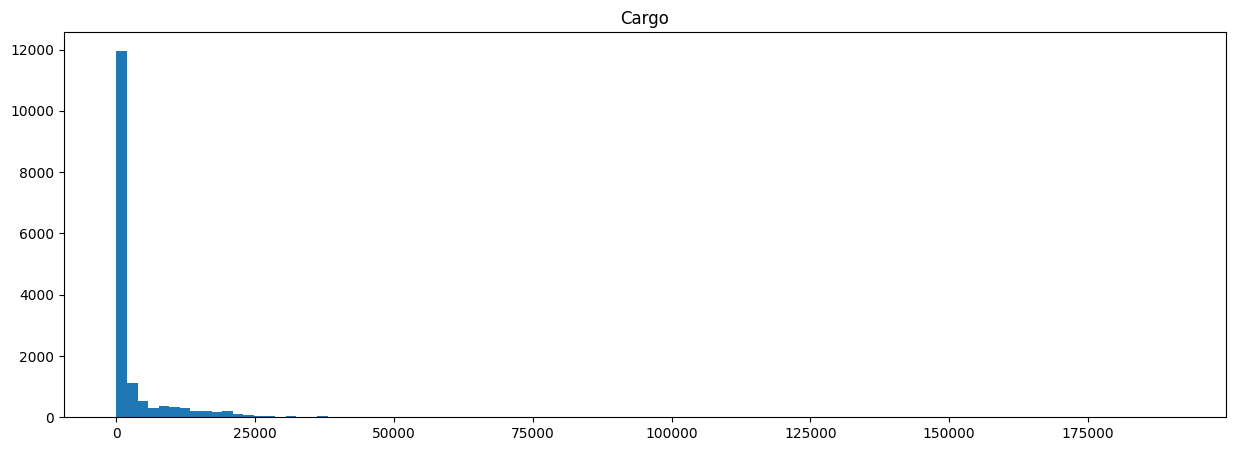

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(df["Cargo"], bins=100)
ax.set_title("Cargo")
plt.show()

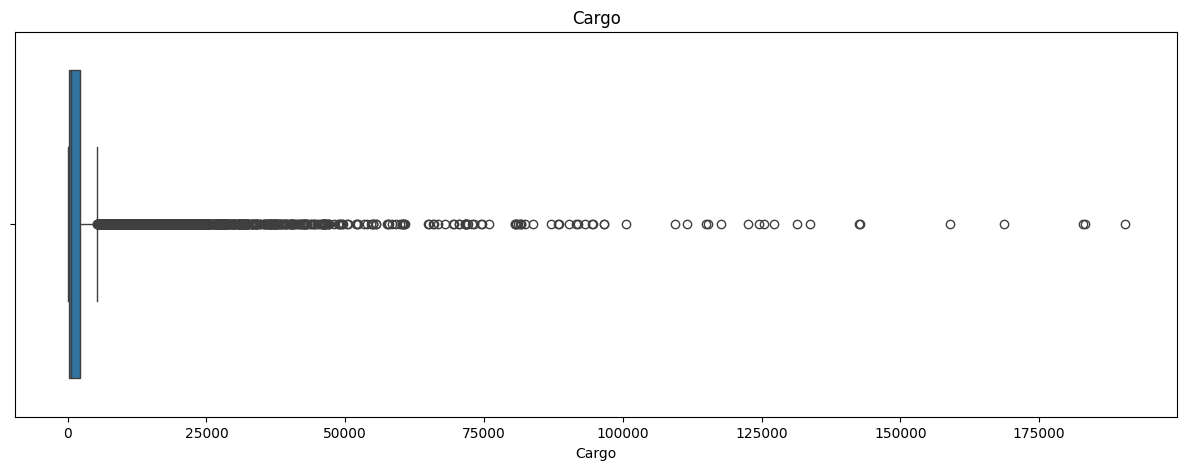

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x=df["Cargo"],ax=ax)
ax.set_title("Cargo")
plt.show()

Se considera que esta distribución tan diferente con valores atipicos se debe a que hay cargos de alimentación, vuelos y hospedaje. Los de alimentación no deberían ser tan altos como los cargos por vuelos ni los hospedajes de larga estancia.

In [31]:
sesgo = skew(df['Cargo'])
print("Sesgo de la distribución de Total:", sesgo)

Sesgo de la distribución de Total: 7.24555905282701


Con la función skew(), al tener un valor de retorno alto de 7.37, podemos decir que tenemos un sesgo fuerte a la derecha (cola larga hacia gastos altos).

Con una función logaritmica “compactamos” los valores altos y ayuda a que la distribución sea más normal, más adelante veremos si necesitamos esto.

## **Variables categóricas y cardinalidad**

In [32]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
df.describe(include='object').T

,count,unique,top,freq
CpnyID,16283,21,12-24,1742
Post,16283,1,AP,16283
Company,16283,1,INTER,16283
Nombre cuenta,16283,3,Alimentación (GVV),10524
Entidad,16283,8,102-OPT,8202
Empleado,16283,139,E01013,638
Desc,16283,6884,HOLIDAY INN,503
Proyecto,16283,388,A3835R,937
ID,16283,2,AC,16282
Periodo,16283,21,12-24,1742


Observando esta información de las variables categóricas podemos eliminar las columnas Post y Company por tener un valor único.

In [33]:
df = df.drop(["Post", "Company"], axis=1)

La información contenida en Entidad, Proyecto, ID, Periodo y User no son tan relevantes, por lo que procederemos a eliminar estas columnas.

In [34]:
df = df.drop(["Entidad", "Proyecto", "ID", "Periodo", "User"], axis=1)

Volvemos a revisar la información de las variables categoricas.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16283 entries, 0 to 16424
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CpnyID         16283 non-null  object 
 1   Nombre cuenta  16283 non-null  object 
 2   Empleado       16283 non-null  object 
 3   Desc           16283 non-null  object 
 4   Batch          16283 non-null  float64
 5   Referencia     16283 non-null  float64
 6   Fecha          16283 non-null  object 
 7   Fecha          16283 non-null  object 
 8   Desc.1         16283 non-null  object 
 9   Cargo          16283 non-null  float64
 10  Moneda         16283 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.5+ MB


In [36]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
df.describe(include='object').T

,count,unique,top,freq
CpnyID,16283,21,12-24,1742
Nombre cuenta,16283,3,Alimentación (GVV),10524
Empleado,16283,139,E01013,638
Desc,16283,6884,HOLIDAY INN,503
Fecha,16283,176,17/12/2024 00:00:00 a.12./p.12.,597
Fecha,16283,374,11/12/2024 13:01:00 a.12./p.12.,382
Desc.1,16283,15,Alimentacion,10522
Moneda,16283,3,MXP,16268


Eliminaremos la segunda columna de `Fecha `, esta columna es la fecha en la que se realizó la comprobación del gasto y nos quedaremos con `Fecha`, que es la fecha en que se reportó el gasto.

In [37]:
df = df.drop(["Fecha "], axis=1)

Entonces nos quedan 6 columnas categóricas.

In [38]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
cat_cols

['CpnyID', 'Nombre cuenta', 'Empleado', 'Desc', 'Fecha', 'Desc.1', 'Moneda']

Realizaremos graficos de barras para las variables con pocas categorias.

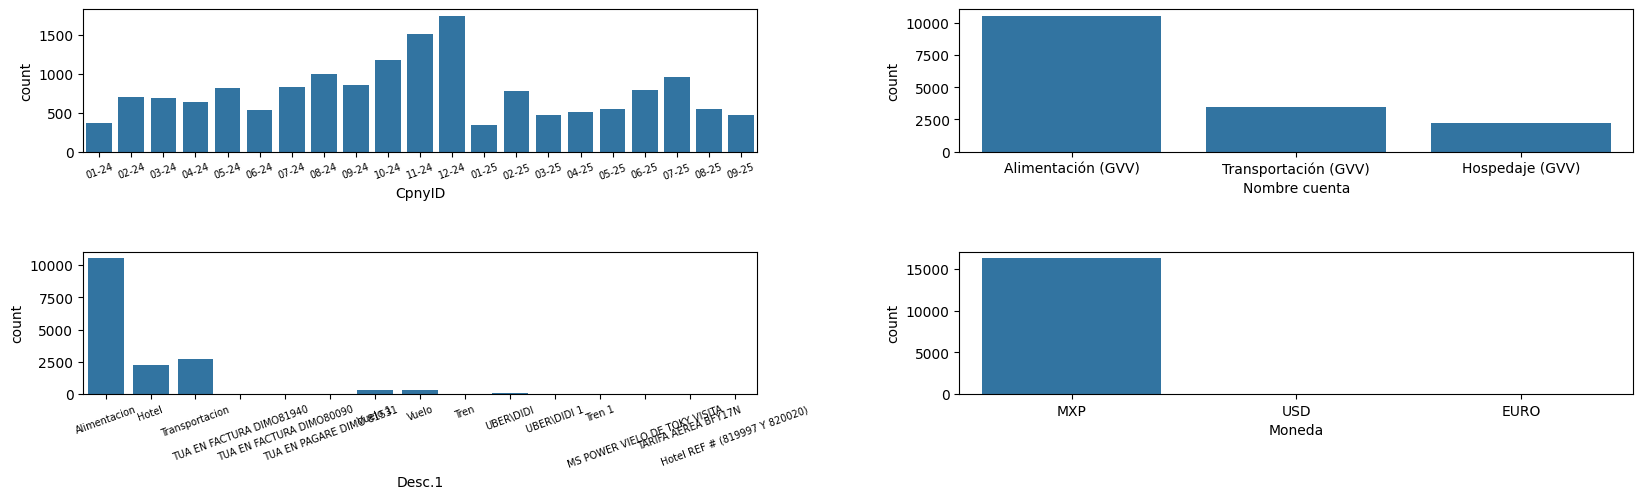

In [39]:
cat_cols_min = ['CpnyID', 'Nombre cuenta', 'Desc.1', 'Moneda']
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20,5))
axes[0,0].tick_params(axis='x',rotation=20,labelsize=7)
axes[1,0].tick_params(axis='x',rotation=20,labelsize=7)
axes = axes.ravel()
fig.subplots_adjust(wspace=0.3, hspace=0.7)
for col, ax in zip(df[cat_cols_min], axes):
  sns.countplot(x=col, data=df,ax=ax)

Procederemos a eliminar los registros que en `Desc.1` tengan algo diferente a Alimentacion, Hotel y Transportacion. Ya que se supone nadamas deberiamos tener esas 3 categorias, así como se ve en `Nombre cuenta`.

In [40]:
validos = ['Alimentacion', 'Transportacion', 'Hotel']
df = df[df["Desc.1"].isin(validos)]

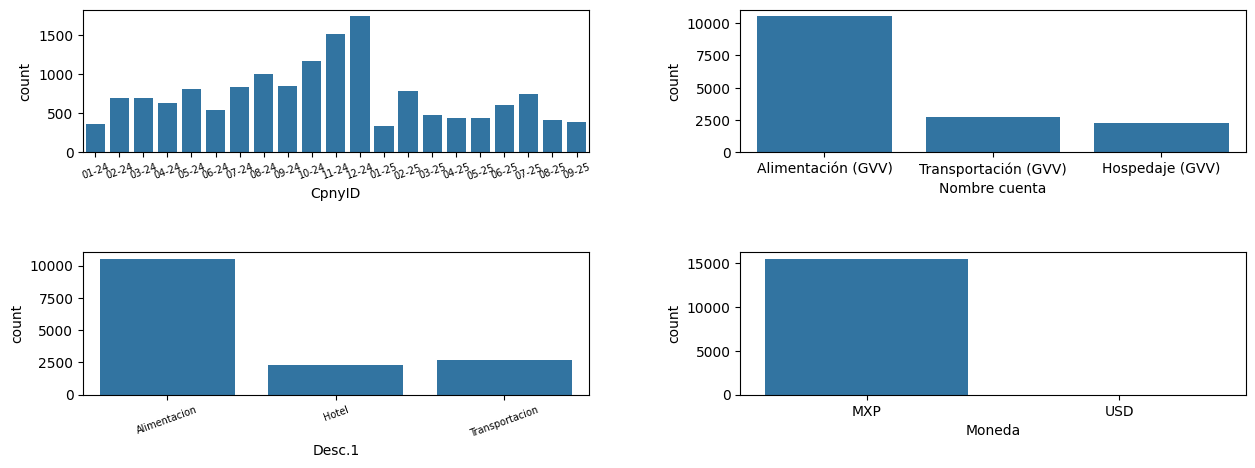

In [41]:
cat_cols_min = ['CpnyID', 'Nombre cuenta', 'Desc.1', 'Moneda']
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(15,5))
axes[0,0].tick_params(axis='x',rotation=20,labelsize=7)
axes[1,0].tick_params(axis='x',rotation=20,labelsize=7)
axes = axes.ravel()
fig.subplots_adjust(wspace=0.3, hspace=0.7)
for col, ax in zip(df[cat_cols_min], axes):
  sns.countplot(x=col, data=df,ax=ax)

## **Tendencias Temporales**

La variable `CpnyID` esta conformada por el mes y el año en que se realizó el gasto. Por lo que podemos utilizar esta variable para generar unas columnas de mes y año para realizar nuestras tendencias temporales.

In [42]:
df['CpnyID_dt'] = pd.to_datetime(df['CpnyID'], format="%m-%y")

# Ahora puedes sacar columnas auxiliares
df['Año'] = df['CpnyID_dt'].dt.year
df['Mes'] = df['CpnyID_dt'].dt.month
df['Mes_nombre'] = df['CpnyID_dt'].dt.strftime('%B')  # en inglés por defecto
df.head(5)

,CpnyID,Nombre cuenta,Empleado,Desc,Batch,Referencia,Fecha,Desc.1,Cargo,Moneda,CpnyID_dt,Año,Mes,Mes_nombre
0,01-24,Alimentación (GVV),E01013,BILLA,483120.0,814603.0,11/01/2024 00:00:00 a.1./p.1.,Alimentacion,296.70,MXP,2024-01-01,2024,1,January
1,01-24,Alimentación (GVV),E01013,HUDSON,483120.0,814604.0,11/01/2024 00:00:00 a.1./p.1.,Alimentacion,250.91,MXP,2024-01-01,2024,1,January
2,01-24,Alimentación (GVV),E01013,MCDONALDS,483120.0,814605.0,11/01/2024 00:00:00 a.1./p.1.,Alimentacion,281.15,MXP,2024-01-01,2024,1,January
3,01-24,Alimentación (GVV),E01013,A817,483121.0,814606.0,11/01/2024 00:00:00 a.1./p.1.,Alimentacion,266.14,MXP,2024-01-01,2024,1,January
4,01-24,Alimentación (GVV),E01013,ABLA1031,483121.0,814608.0,11/01/2024 00:00:00 a.1./p.1.,Alimentacion,28.22,MXP,2024-01-01,2024,1,January


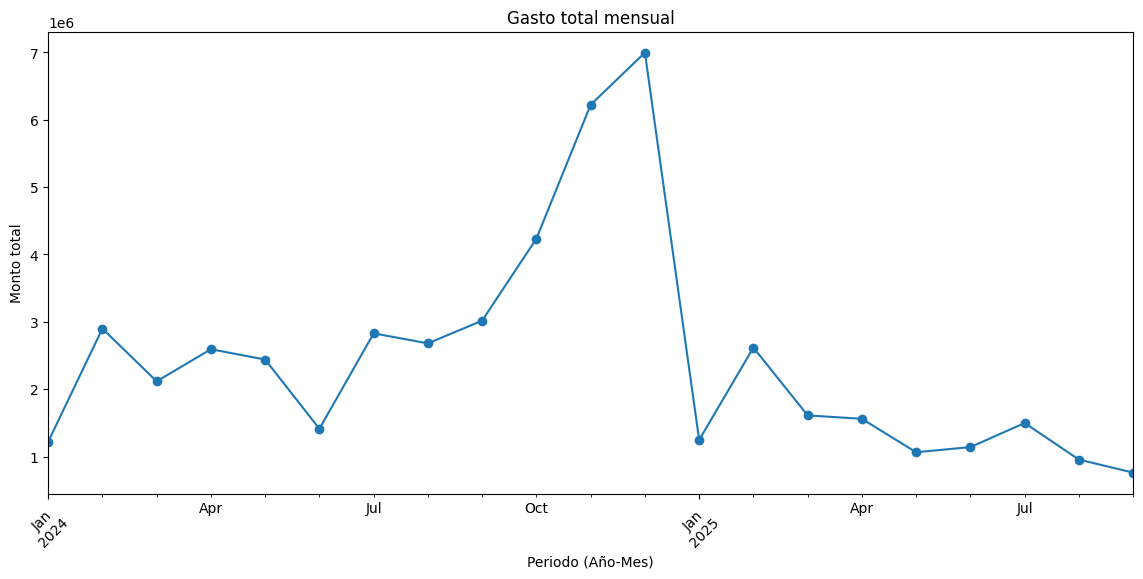

In [43]:
# Agrupar por mes
gasto_mensual = df.groupby('CpnyID_dt')['Cargo'].sum()

plt.figure(figsize=(14,6))
gasto_mensual.plot(kind='line', marker='o')
plt.title("Gasto total mensual")
plt.xlabel("Periodo (Año-Mes)")
plt.ylabel("Monto total")
plt.xticks(rotation=45)
plt.show()

Si bien se identifican variaciones en el gasto mensual y estacionalidad en ciertos periodos, estas tendencias **no** son determinantes para el objetivo del proyecto, ya que **la tarea principal se centra en la clasificación de gastos a partir de la información contenida en los tickets**. La variable temporal mas que nada nos puede servir para hacer la referncia cruzada con la información contenida en el ticket, ya que puede haber gastos del mismo monto, pero se pueden diferenciar por la fecha.

## **Análisis bivariado y correlaciones**

Analizar total contra Nombre Cuenta

<Axes: xlabel='Desc.1', ylabel='Cargo'>

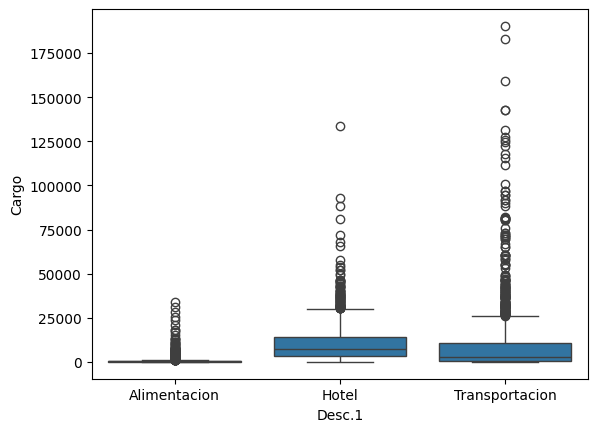

In [44]:
sns.boxplot(x=df["Desc.1"], y=df["Cargo"])

El boxplot presenta la distribución de los cargos `Cargo` segmentados por el tipo de gasto `Desc.1`, que incluye tres categorías: Alimentación, Hotel y Transportación.

**Alimentación:**
Los valores se concentran en montos bajos. La mediana es bastante pequeña y los bigotes (rangos intercuartílicos) son cortos, lo que indica poca variabilidad. Sin embargo, se observan varios valores atípicos que superan significativamente la escala normal de gastos en esta categoría. Que esto puede explicarse a gastos de comidas que a veces se hacen para todo el equipo (más de 15 personas) o comidas con los clientes.

**Hotel:**
La dispersión de los valores es mayor que en alimentación. La mediana se encuentra en un nivel intermedio y el rango intercuartílico es más amplio, lo que refleja que los cargos por hospedaje suelen ser más altos y variables. Existen valores atípicos elevados que probablemente corresponden a estancias prolongadas o cargos de hoteles más costosos.

**Transportación:**
Esta categoría muestra la mayor variabilidad y el rango más amplio de cargos. La mediana es relativamente baja, pero los bigotes y, sobre todo, la cantidad de valores atípicos muy elevados (incluso superiores a 150,000) evidencian que aquí se concentran los gastos de vuelos u otros transportes de alto costo, debido a veces por viajes de urgencia.

## **Imagenes**

A continuación desplegaremos 4 de los tickets que se tienen, para mostrarlos como ejemplos.

In [45]:
tickets_path = '/content/drive/MyDrive/MNA - Proyecto Integrador/Semana 3/Tickets/E01352/'

### Alimentación

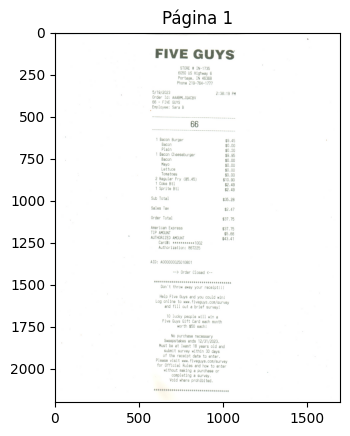

In [46]:
# Convertir a imágenes (una por página)
pages = convert_from_path(tickets_path + "778406_ComidaFiveGuys.pdf")

for i, page in enumerate(pages):
    image = np.array(page)  # convertir a array de numpy si lo necesitas
    plt.imshow(image, cmap="gray")
    plt.title(f"Página {i+1}")
    plt.show()

### Transportación

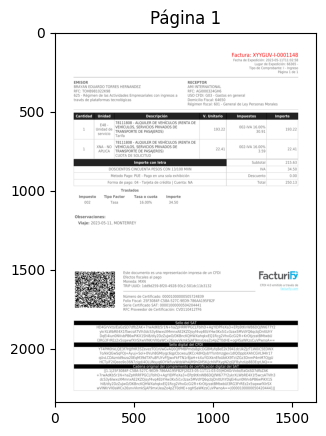

In [47]:
# Convertir a imágenes (una por página)
pages = convert_from_path(tickets_path + "778399_Viaje de Uber 11_mayo.pdf")

for i, page in enumerate(pages):
    image = np.array(page)  # convertir a array de numpy si lo necesitas
    plt.imshow(image, cmap="gray")
    plt.title(f"Página {i+1}")
    plt.show()

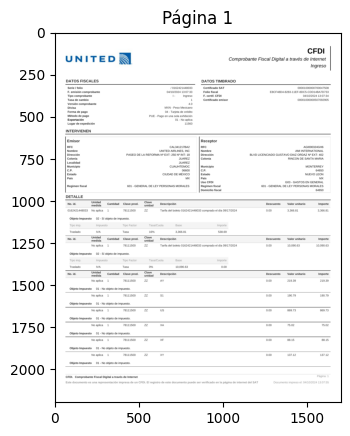

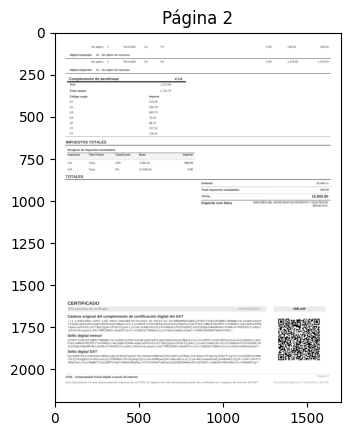

In [48]:
# Convertir a imágenes (una por página)
pages = convert_from_path(tickets_path + "847308_850445_Vuelo ida y vuelta_2009_0310_factura.pdf")

for i, page in enumerate(pages):
    image = np.array(page)  # convertir a array de numpy si lo necesitas
    plt.imshow(image, cmap="gray")
    plt.title(f"Página {i+1}")
    plt.show()

### Hospedaje

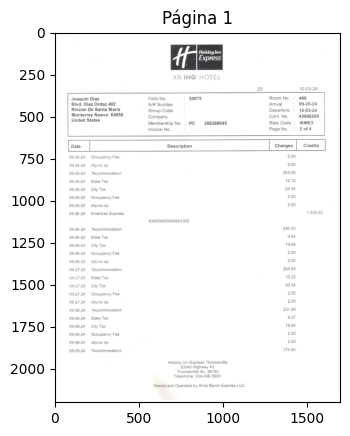

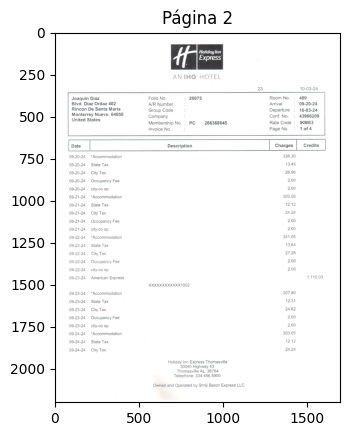

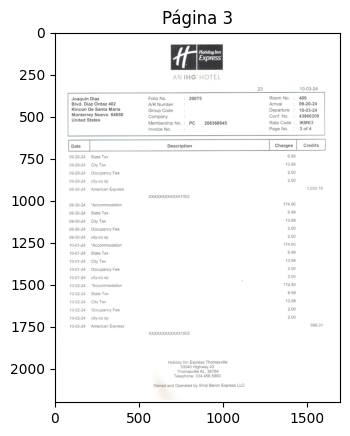

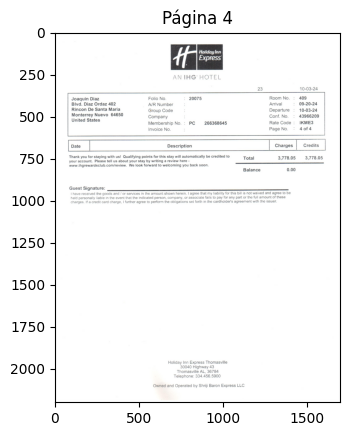

In [49]:
# Convertir a imágenes (una por página)
pages = convert_from_path(tickets_path + "850655_850643_850641_850566_HolidayInn_Estadia.pdf")

for i, page in enumerate(pages):
    image = np.array(page)  # convertir a array de numpy si lo necesitas
    plt.imshow(image, cmap="gray")
    plt.title(f"Página {i+1}")
    plt.show()

## **Conclusiones del EDA**

Al final nuestro dataset quedo de la siguiente manera:

In [50]:
df.head(5)

,CpnyID,Nombre cuenta,Empleado,Desc,Batch,Referencia,Fecha,Desc.1,Cargo,Moneda,CpnyID_dt,Año,Mes,Mes_nombre
0,01-24,Alimentación (GVV),E01013,BILLA,483120.0,814603.0,11/01/2024 00:00:00 a.1./p.1.,Alimentacion,296.70,MXP,2024-01-01,2024,1,January
1,01-24,Alimentación (GVV),E01013,HUDSON,483120.0,814604.0,11/01/2024 00:00:00 a.1./p.1.,Alimentacion,250.91,MXP,2024-01-01,2024,1,January
2,01-24,Alimentación (GVV),E01013,MCDONALDS,483120.0,814605.0,11/01/2024 00:00:00 a.1./p.1.,Alimentacion,281.15,MXP,2024-01-01,2024,1,January
3,01-24,Alimentación (GVV),E01013,A817,483121.0,814606.0,11/01/2024 00:00:00 a.1./p.1.,Alimentacion,266.14,MXP,2024-01-01,2024,1,January
4,01-24,Alimentación (GVV),E01013,ABLA1031,483121.0,814608.0,11/01/2024 00:00:00 a.1./p.1.,Alimentacion,28.22,MXP,2024-01-01,2024,1,January


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15483 entries, 0 to 16424
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CpnyID         15483 non-null  object        
 1   Nombre cuenta  15483 non-null  object        
 2   Empleado       15483 non-null  object        
 3   Desc           15483 non-null  object        
 4   Batch          15483 non-null  float64       
 5   Referencia     15483 non-null  float64       
 6   Fecha          15483 non-null  object        
 7   Desc.1         15483 non-null  object        
 8   Cargo          15483 non-null  float64       
 9   Moneda         15483 non-null  object        
 10  CpnyID_dt      15483 non-null  datetime64[ns]
 11  Año            15483 non-null  int32         
 12  Mes            15483 non-null  int32         
 13  Mes_nombre     15483 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(8)
memory usage: 1.7+ MB

**Limpieza de datos:**

Se identificaron registros con valores faltantes y un renglón de sumatoria general, los cuales fueron eliminados.

* Variables numéricas: Se detectaron outliers en los montos de los gastos. Estos corresponden principalmente a hospedaje y transportación, donde los valores tienden a ser naturalmente más altos que en alimentación. La variable Credito se descartó para este análisis, ya que el objetivo es trabajar únicamente con cargos (gastos).

* Variables categóricas: Algunas columnas (Post, Company) fueron eliminadas por carecer de variabilidad. Otras (Entidad, Proyecto, ID, Periodo, User) mostraron alta cardinalidad y poca relevancia analítica, por lo que también se descartaron. La variable clave de clasificación (Desc.1) presenta tres categorías principales: Alimentación, Hospedaje y Transportación.

Tras la limpieza, el dataset quedó conformado por 15,483 registros válidos, lo que asegura consistencia en los análisis posteriores.

**Distribución y sesgo:**

La variable Cargo muestra una distribución sesgada hacia la derecha: la mayoría de los gastos son pequeños, mientras que pocos alcanzan valores altos. Este comportamiento es consistente con patrones de gastos de viaje y podría requerir transformaciones no lineales (por ejemplo, logaritmo) en fases posteriores.

**Tendencias temporales:**

El análisis temporal refleja un comportamiento variable del gasto entre meses, con picos en ciertos periodos. Esto sugiere la existencia de estacionalidad en el gasto, posiblemente relacionada con proyectos específicos, temporadas de viaje o cierres de periodo. Pero como se comentó previamente, esto no es una tendencia relevante para el análisis central del proyecto.

**Desequilibrio de clases:**

La distribución de categorías es desigual: los gastos de Alimentación representan la mayor proporción, seguidos por Hospedaje y en menor medida Transportación. Esto implica que, en un modelo de clasificación, podría ser necesario aplicar técnicas de balanceo para evitar sesgo hacia la clase mayoritaria.

**Relaciones relevantes:**

Se observa una fuerte relación entre el tipo de gasto (Desc.1) y el monto (Cargo). Hospedaje tiende a concentrar los valores altos, mientras que Alimentación agrupa la mayoría de los gastos de bajo monto.